In [1]:
#Integrantes:
#Fecha
#Descripción

In [2]:
#Importanción de bibliotecas
%matplotlib inline
import numpy as np
import matplotlib.pylab
from matplotlib import pylab
from pylab import *
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_olivetti_faces 
from skimage import color
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
gabriel = img.imread('gabriel.jpg')
gabriel = color.rgb2gray(gabriel)
gabriel = np.reshape(gabriel, (4096,))

fer = img.imread('fernando.jpg')
fer = color.rgb2gray(fer)
fer = np.reshape(fer, (4096,))

yael = img.imread('yael.jpg')
yael = color.rgb2gray(yael)
yael = np.reshape(yael, (4096,))

(403, 4096)


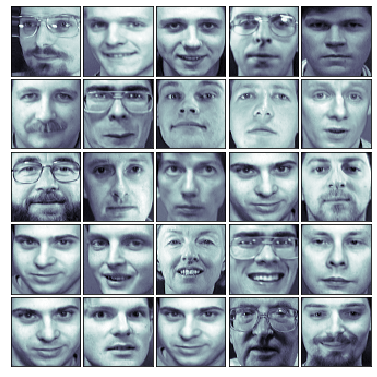

In [4]:
faces = fetch_olivetti_faces().data
faces = np.insert(faces, 0, gabriel,axis=0)
faces = np.insert(faces, 0, fer,axis=0)
faces = np.insert(faces, 0, yael,axis=0)
print(faces.shape) # there are 400 faces each of them is of 64x64=4096 pixels
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot 25 random faces
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(faces[i,:],(64,64)), cmap=plt.cm.bone, interpolation='nearest') 
    j += 1
plt.show()

(403, 64)


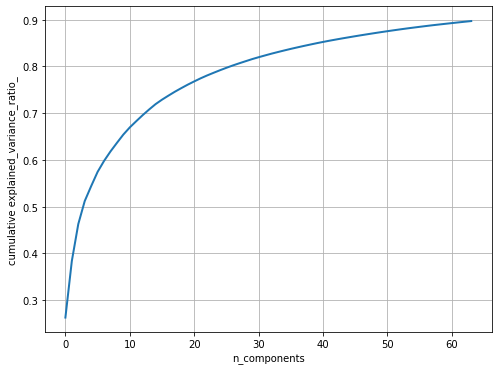

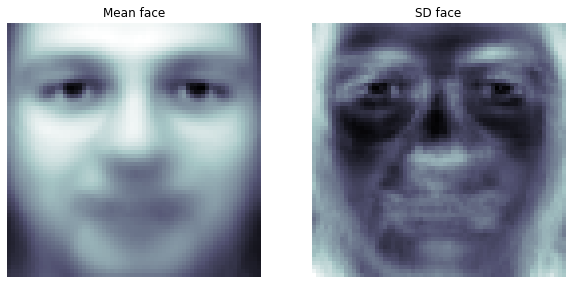

In [5]:
# n_comp = numero de eigenfaces probar con diferentes calores
n_comp =64
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape)
# (400, 64)
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))
pylab.figure(figsize=(8, 6))
pylab.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components'), pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('SD face')
pylab.show()

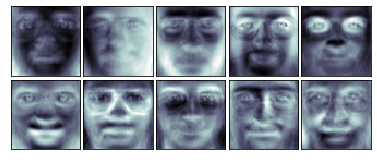

In [6]:
fig = plt.figure(figsize=(5,2)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the first 10 eigenfaces
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pipeline.named_steps['pca'].components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

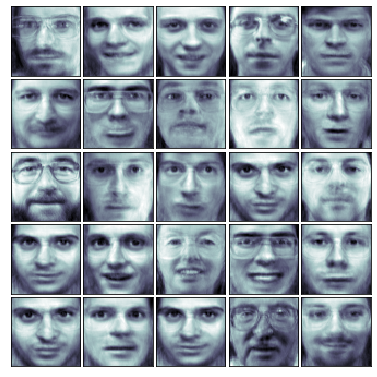

In [27]:
# face reconstruction
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj) 
#reshaping as 400 images of 64x64 dimension 
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(mean_face + sd_face*np.reshape(faces_inv_proj,(403,64,64)) [i,:], cmap=plt.cm.bone, interpolation='nearest')
    j += 1
     

(64,)
(64, 4096)


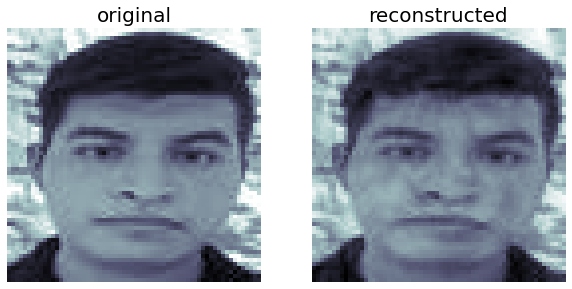

In [16]:
print(faces_proj[2,:].shape)
print(pipeline.named_steps['pca'].components_.shape)
orig_face = np.reshape(faces[2,:], (64,64))
reconst_face = np.reshape(faces_proj[2,]@pipeline.named_steps['pca'].components_, (64,64))
reconst_face = mean_face + sd_face*reconst_face
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(orig_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(reconst_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('reconstructed', size=20)
plt.show()
     

In [12]:
#plt.imshow(faces_proj[1,:], cmap=plt.cm.bone, interpolation='nearest')
#plt.show()

pipeline.named_steps['pca'].components_.shape

(64, 4096)

IndexError: index 172 is out of bounds for axis 0 with size 64

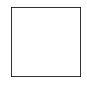

In [48]:
# face reconstruction
faces_inv_proj = pipeline.named_steps['pca'].components_ 
#reshaping as 400 images of 64x64 dimension 
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(mean_face + sd_face*np.reshape(faces_inv_proj,(64,64,64)) [i,:], cmap=plt.cm.bone, interpolation='nearest')
    j += 1

In [50]:

faces_inv_proj.shape

IndentationError: unexpected indent (1447841153.py, line 5)

In [44]:
faces.shape

(403, 4096)

In [53]:
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj) 
faces_inv_proj.shape

(403, 4096)